## Entrega Estadística
### Santiago Torres Busquets
#### Master Big Data & Data Science - Universidad Complutense de Madrid

In [17]:
# Tratamiento de datos
import pandas as pd
import numpy as np

# Gráficos
import matplotlib.pyplot as plt
from matplotlib import style

# Otras librerias
import statistics as s
import statsmodels.api as sm

# lectura del fichero excel que contienen las observaciones
df = pd.read_excel('eval_master.xlsx')

In [16]:
# Vista previa del dataframe
df.head()

,Grupo de control,Nivel glucosa basal,Nivel glucosa 60 min
0,1,90,159
1,1,82,151
2,1,80,148
3,1,75,138
4,1,74,141


### Ejercicio 1

In [7]:
# separo los grupos de control
grupo1 = df[df['Grupo de control'] == 1]
grupo2 = df[df['Grupo de control'] == 2]

<b>a) Medidas de tendencia central y dispersión</b>

In [8]:
# defino la columna de nivel de glucosa basal para cada grupo
ngb1 = grupo1['Nivel glucosa basal']

# medidas de tendencia central
mean_ngb1 = ngb1.mean()
median_ngb1 = ngb1.median()
mode_ngb1 = s.multimode(ngb1)

# medidas de dispersion
var_ngb1 = ngb1.var()
std_ngb1 = ngb1.std()
rango_ngb1 = ngb1.max() - ngb1.min()
q1_ngb1 = ngb1.quantile(q=0.25, interpolation='lower')
q3_ngb1 = ngb1.quantile(q=0.75, interpolation='lower')
ric_ngb1 = q3_ngb1 - q1_ngb1

print("Mean: ", mean_ngb1)
print("Median: ", median_ngb1)
print("Mode: ", mode_ngb1)
print("Variance: ", var_ngb1)
print("Standard Deviaton: ", std_ngb1)
print("Rango: ", rango_ngb1)
print("Q1: ", q1_ngb1)
print("Q3: ", q3_ngb1)
print("RIC: ", ric_ngb1)

Mean:  84.68571428571428
Median:  82.0
Mode:  [90, 82, 75, 79]
Variance:  78.22184873949581
Standard Deviaton:  8.844311660016047
Rango:  38
Q1:  78
Q3:  90
RIC:  12


In [9]:
ngb2 = grupo2['Nivel glucosa basal']
mean_ngb2 = ngb2.mean()
median_ngb2 = ngb2.median()
mode_ngb2 = ngb2.mode()[0]
var_ngb2 = ngb2.var()
std_ngb2 = ngb2.std()
rango_ngb2 = ngb2.max() - ngb2.min()
q1_ngb2 = ngb2.quantile(0.25)
q3_ngb2 = ngb2.quantile(0.75)
ric_ngb2 = q3_ngb2 - q1_ngb2

print("Mean: ", mean_ngb2)
print("Median: ", median_ngb2)
print("Mode: ", mode_ngb2)
print("Variance: ", var_ngb2)
print("Standard Deviation: ", std_ngb2)
print("Rango: ", rango_ngb2)
print("Q1: ", q1_ngb2)
print("Q3: ", q3_ngb2)
print("RIC: ", ric_ngb2)

Mean:  89.4
Median:  90.0
Mode:  88
Variance:  53.97241379310344
Standard Deviation:  7.346591984934473
Rango:  27
Q1:  84.5
Q3:  94.0
RIC:  9.5


<b>Representatividad de las medias</b>

In [10]:
# coeficiente de variacion (CV) del nivel de glucosa basal para el grupo de control 1
cv1 = std_ngb1 / mean_ngb1 * 100
print("Coeficiente de Variación: ",cv1)

Coeficiente de Variación:  10.44368785764378


In [11]:
# coeficiente de variacion (CV) del nivel de glucosa basal para el grupo de control 2
cv2 = std_ngb2 / mean_ngb2 * 100
print("Coeficiente de Variación: ",cv2)

Coeficiente de Variación:  8.217664412678381


Podemos observar que el coeficiente de variación para ambos grupos de control es menor al 30%, por lo que la media puede considerarse representativa para ambos casos.

<b>b) Asimetría y curtosis del nivel de glucosa basal en los adultos (grupo de control 2).</b>

In [12]:
print('Curtosis:', ngb2.kurt())
print('Asimetria:', ngb2.skew())

Curtosis: -0.6126607185115627
Asimetria: -0.007469046650921391


<b>c) Valor de cuartiles para el grupo de control 1, para ambas variables.<b>

In [13]:
# Valor de los cuartiles para el nivel de glucosa basal, grupo 1
print("Q1: ", q1_ngb1)
print("Q3: ", q3_ngb1)
print("RIC: ", ric_ngb1)

Q1:  78
Q3:  90
RIC:  12


El Q1 representa que el 25% de las observaciones de la muestra se encuentran por debajo del valor 78
El Q3 representa que el 75% de las observaciones de la muestra se encuentran por debajo del valor 90
El RIC representa a los datos comprendidos entre el 25% y el 75% de las observaciones, es decir ese 50% entre el Q3 y Q1.

In [15]:
# separo el nivel de glucosa a la hora de la ingesta de 100 mg de glucosa
ng60_1 = grupo1['Nivel glucosa 60 min']

# Valor de los cuartiles para el nivel de glucosa a los 60 min de la ingesta de glucosa, grupo 1
q1_ng60_1 = ng60_1.quantile(0.25, interpolation='lower')
q3_ng60_1 = ng60_1.quantile(0.75, interpolation='lower')
ric_ng60_1 = q3_ng60_1 - q1_ng60_1

print('Q1: ', q1_ng60_1)
print('Q3: ', q3_ng60_1)
print('RIC: ', ric_ng60_1)

Q1:  146
Q3:  154
RIC:  8


El Q1 representa que el 25% de las observaciones de la muestra se encuentran por debajo del valor 146
El Q3 representa que el 75% de las observaciones de la muestra se encuentran por debajo del valor 154
El RIC representa a los datos comprendidos entre el 25% y el 75% de las observaciones, es decir ese 50% entre el Q3 y Q1.

<b>Boxplot para las variables de estudio, grupo de control 1.</b>

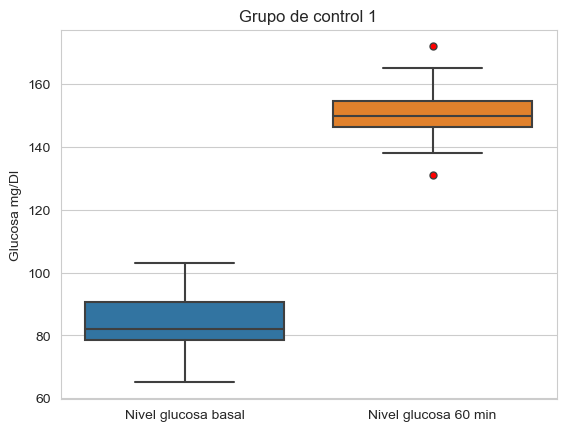

In [75]:
import seaborn as sns

# Excluir la primera columna del grupo 
datos_grupo1 = grupo1.loc[:, grupo1.columns!='Grupo de control']
flierprops = dict(marker='o', markerfacecolor='red', markersize=5, linestyle='none')
fig = plt.figure()
sns.set_style("whitegrid")
ax = fig.add_subplot(111)
ax.set_title('Grupo de control 1')
ax.set_ylabel('Glucosa mg/Dl')

# Visualizacion del boxplot
sns.boxplot(flierprops=flierprops,width=0.8,data=datos_grupo1);

**d) Normalidad de los datos del nivel de glucosa a los 60 min de la ingesta de glucosa, para ambos grupos de control.**

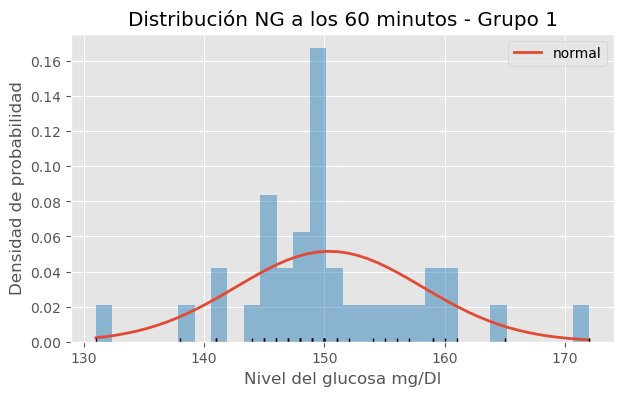

In [34]:
from scipy import stats

# curva de la normal
mean_ng60_1 = ng60_1.mean()
mu = mean_ng60_1
std_ng60_1 = ng60_1.std()
sigma = std_ng60_1
x_hat = np.linspace(min(ng60_1), max(ng60_1))
y_hat = stats.norm.pdf(x_hat, mu, sigma)

# Gráfico
fig, ax = plt.subplots(figsize=(7,4))
ax.plot(x_hat, y_hat, linewidth=2, label='normal')
ax.hist(x=ng60_1, density=True, bins=30, color="#3182bd", alpha=0.5)
ax.plot(ng60_1, np.full_like(ng60_1, -0.01), '|k', markeredgewidth=1)
ax.set_title('Distribución NG a los 60 minutos - Grupo 1')
ax.set_xlabel('Nivel del glucosa mg/Dl')
ax.set_ylabel('Densidad de probabilidad')
ax.legend();

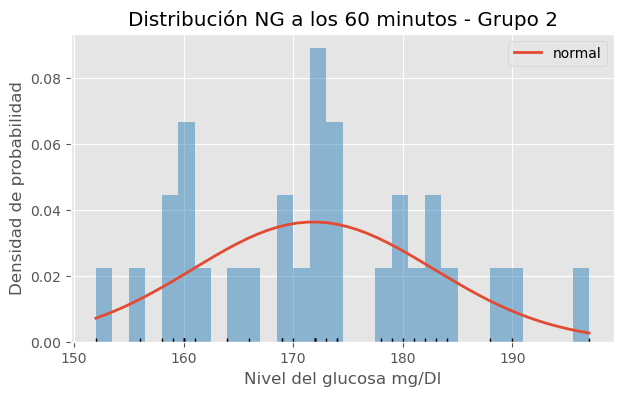

In [33]:
ng60_2 = grupo2['Nivel glucosa 60 min']

# curva de la normal
mean_ng60_2 = ng60_2.mean()
mu2 = mean_ng60_2
std_ng60_2 = ng60_2.std()
sigma2 = std_ng60_2
x_hat2 = np.linspace(min(ng60_2), max(ng60_2))
y_hat2 = stats.norm.pdf(x_hat2, mu2, sigma2)

# Gráfico
fig, ax = plt.subplots(figsize=(7,4))
ax.plot(x_hat2, y_hat2, linewidth=2, label='normal')
ax.hist(x=ng60_2, density=True, bins=30, color="#3182bd", alpha=0.5)
ax.plot(ng60_2, np.full_like(ng60_2, -0.01), '|k', markeredgewidth=1)
ax.set_title('Distribución NG a los 60 minutos - Grupo 2')
ax.set_xlabel('Nivel del glucosa mg/Dl')
ax.set_ylabel('Densidad de probabilidad')
ax.legend();

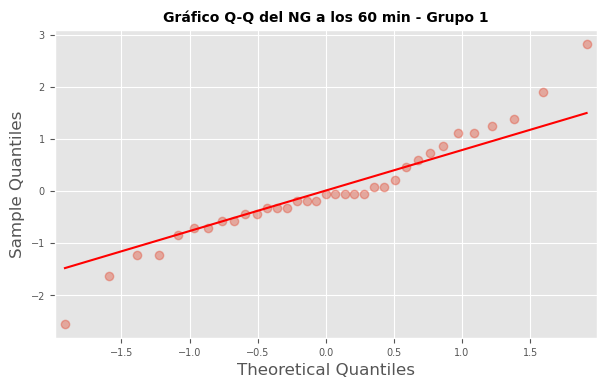

In [35]:
# Configuración matplotlib
plt.style.use('ggplot')

# Gráfico Q-Q
# ==============================================================================
fig, ax = plt.subplots(figsize=(7,4))
sm.qqplot(
    ng60_1,
    fit   = True,
    line  = 'q',
    alpha = 0.4,
    lw    = 2,
    ax    = ax
)
ax.set_title('Gráfico Q-Q del NG a los 60 min - Grupo 1', fontsize = 10,
             fontweight = "bold")
ax.tick_params(labelsize = 7)

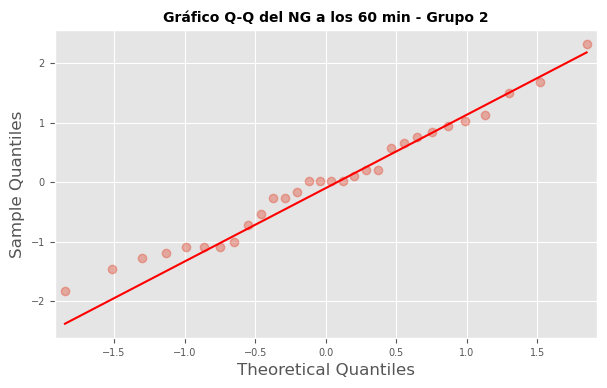

In [36]:
# Gráfico Q-Q
# ==============================================================================
fig, ax = plt.subplots(figsize=(7,4))
sm.qqplot(
    ng60_2,
    fit   = True,
    line  = 'q',
    alpha = 0.4,
    lw    = 2,
    ax    = ax
)
ax.set_title('Gráfico Q-Q del NG a los 60 min - Grupo 2', fontsize = 10,
             fontweight = "bold")
ax.tick_params(labelsize = 7)

In [37]:
# Shapiro-Wilk test grupo 1
# ==============================================================================
shapiro_test = stats.shapiro(ng60_1)
shapiro_test

ShapiroResult(statistic=0.9626076817512512, pvalue=0.2734089195728302)

In [38]:
# Shapiro-Wilk test grupo 2
# ==============================================================================
shapiro_test = stats.shapiro(ng60_2)
shapiro_test

ShapiroResult(statistic=0.9776138663291931, pvalue=0.7591866254806519)

In [39]:
# D'Agostino's K-squared test
# ==============================================================================
k2, p_value = stats.normaltest(ng60_1)
print(f"Estadístico = {k2}, p-value = {p_value}")

Estadístico = 3.6141410458414556, p-value = 0.16413426075809492


In [40]:
# D'Agostino's K-squared test
# ==============================================================================
k2, p_value = stats.normaltest(ng60_2)
print(f"Estadístico = {k2}, p-value = {p_value}")

Estadístico = 0.5378866941075515, p-value = 0.7641865478412724


## Ejercicio 2

**a) Estudio de la relación lineal entre las dos variables para el grupo de control 1.**

In [52]:
# Cálculo de correlación con Pandas
# ==============================================================================
print('Correlación Pearson: ', ngb1.corr(ng60_1, method='pearson'))
print('Correlación spearman: ', ngb1.corr(ng60_1, method='spearman'))
print('Correlación kendall: ', ngb1.corr(ng60_1, method='kendall'))

Correlación Pearson:  0.796405256684113
Correlación spearman:  0.6986506968130681
Correlación kendall:  0.5590353602315468


**b) Modelo de regresión lineal**

In [90]:
import statsmodels.api as sm

x = sm.add_constant(ngb1)
y = ng60_1
modelo = sm.OLS(y, x).fit()
print(modelo.summary())

                             OLS Regression Results                             
Dep. Variable:     Nivel glucosa 60 min   R-squared:                       0.634
Model:                              OLS   Adj. R-squared:                  0.623
Method:                   Least Squares   F-statistic:                     57.23
Date:                  Wed, 18 Jan 2023   Prob (F-statistic):           1.06e-08
Time:                          20:09:45   Log-Likelihood:                -103.17
No. Observations:                    35   AIC:                             210.3
Df Residuals:                        33   BIC:                             213.5
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const         

In [77]:
from sklearn.linear_model import LinearRegression

x = ngb1.values.reshape(-1, 1)
y = ng60_1.values.reshape(-1, 1)
linear_regressor = LinearRegression()
linear_regressor.fit(x, y)
y_pred = linear_regressor.predict(x)

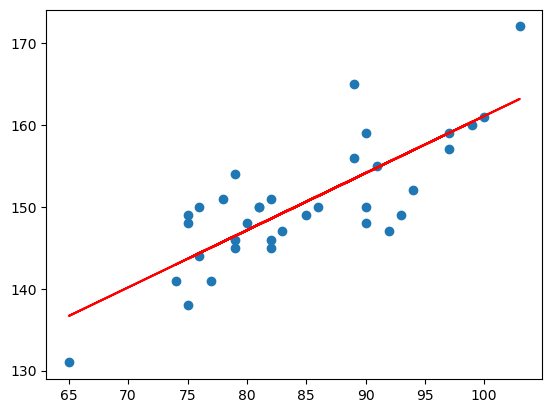

In [35]:
plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.show()

In [82]:
y_pred = linear_regressor.predict(np.array([[83]]))[0]
print(y_pred)

[149.22524816]


Según nuestro modelo de regresión lineal podemos **estimar** que para un paciente cuyo nivel de glucosa basal es de **83 mg/Dl**, a los _60 minutos_ tendrá unos **149,225 mg/Dl**.

**c) Porcentaje no explicado por el modelo de regresión lineal del nivel de glucosa a la hora de la ingesta:**

In [87]:
r2 = linear_regressor.score(x,y)
print('Coeficiente r2: ',r2)

Coeficiente r2:  0.634261332874088


Una vez conocido el coeficiente de determinación $r^2$, en este caso $r^2$ = 63,43% , podemos decir que hay un 36,57% no explicado por el modelo anterior del nivel de glucosa pasados 60 minutos.

**d) Aumento del nivel de glucosa basal en 5mg/Dl y su variación a los 60 minutos.**

In [91]:
beta_1 = 0.6969

El valor de $β_1 = 0,6969$ nos indica que por cada unidad que aumenta el nivel de glucosa basal, aumenta 0,6969 grados el nivel de glucosa basal a los 60 minutos.

In [94]:
print('Variación del nivel de glucosa basal por 5 mg/Dl: ',beta_1 * 5)

Variación del nivel de glucosa basal por 5 mg/Dl:  3.4844999999999997


De acuerdo a los coeficientes obtenidos del modelo podemos estimar que por cada **5 mg/Dl** de aumento en el nivel de glucosa basal de un paciente, a los _60 minutos_ aumentaría un **3,4845 mg/Dl.**

## Ejercicio 3